In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from keras.preprocessing.sequence import pad_sequences
import pickle

In [2]:
# loading dataset and preprocessing
dataset = pd.read_csv('phishing_ham_dataset.csv')
dataset = dataset.where((pd.notnull(dataset)),'')
target = dataset['Label'] # the feature we would like to predict, the label of picture
data = dataset['Body']
dataset

,Body,Label
0,Dear GoDaddy Customer GoDaddy Customer Support...,1
1,Dear Citizens Bank and Charter One Bank custom...,1
2,eBay sent this message Your registered name is...,1
3,Dear Citizens Bank and Charter One Bank custom...,1
4,Dear Citizens Bank and Charter One Bank custom...,1
...,...,...
5357,----------------------------------------------...,0
5358,"EFFector Vol. 15, No. 35 November ...",0
5359,\nWe have extended our Free seat sale until Th...,0
5360,___ ___ ...,0


Text(0.5, 0, 'Email Type')

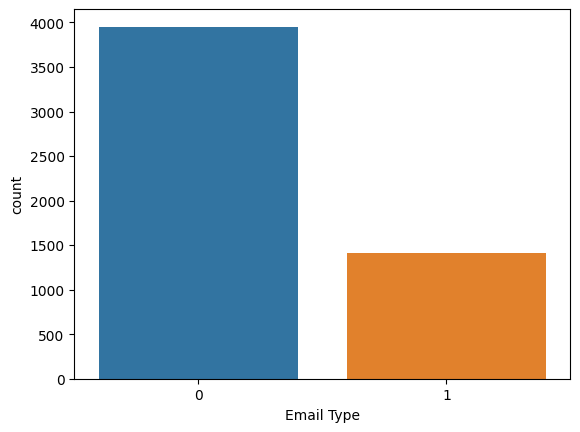

In [4]:
sns.countplot(data=dataset, x='Label')
plt.xlabel('Email Type')
# plt.title('Number of Phishing email and Safe email messages')

In [625]:
print(target)
print(data)

0      0
1      0
2      0
3      0
4      0
      ..
154    2
155    2
156    2
157    2
158    2
Name: Type, Length: 132, dtype: object
0      URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\r\...
1      Dear Friend,\r\n\r\nI am Mr. Ben Suleman a cus...
2      FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...
3      Goodday Dear\r\n\r\n\r\nI know this mail will ...
4      FROM MR. GODWIN AKWESI\r\nTEL: +233 208216645\...
                             ...                        
154    Bags so perfect—you'll never want to be withou...
155    INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...
156    GET THE BEST OF EVERYTHING IN THE APP\r\n\r\nS...
157    Hi!\r\n \r\nSpring forward with our newest noP...
158    Hi,  | PLAYER MEMBER | 0 Points\r\n\r\nEarn An...
Name: Text, Length: 132, dtype: object


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 0)

In [6]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')
feature_extraction = TfidfVectorizer(min_df = 1, stop_words=STOP_WORDS, lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [8]:
print(X_train_features)

  (0, 5397)	0.12880934555740364
  (0, 42839)	0.09311208925869828
  (0, 37282)	0.11242533413213328
  (0, 37721)	0.10713181265334945
  (0, 42583)	0.18677614598316544
  (0, 27852)	0.12238975294872705
  (0, 22664)	0.13729179990367343
  (0, 47840)	0.13963777467290345
  (0, 37151)	0.13337086820880248
  (0, 45812)	0.13786329482284276
  (0, 11774)	0.05349696199218305
  (0, 47851)	0.29029949077690453
  (0, 27854)	0.29029949077690453
  (0, 22877)	0.04964228221169535
  (0, 23923)	0.08226493078592932
  (0, 27364)	0.14259643533819027
  (0, 18728)	0.16240684935943694
  (0, 27050)	0.10583411644106032
  (0, 11413)	0.15831410534684384
  (0, 35902)	0.16048525635172606
  (0, 9228)	0.13691607069659506
  (0, 45803)	0.2329516344111543
  (0, 30526)	0.10465640054752856
  (0, 34958)	0.11143966664705642
  (0, 7539)	0.15866647272046294
  :	:
  (3752, 47399)	0.08485659288874438
  (3752, 27161)	0.1760321196728035
  (3752, 10747)	0.07453677648026781
  (3752, 17513)	0.08181983465182982
  (3752, 48000)	0.082213800606

**Logisitc Regression**

In [9]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=100, penalty='l2', C=1.0)
# , penalty='l2', C=1.0, solver='lbfgs'

history = logistic_regression_model.fit(X_train_features, y_train)

In [13]:
y_pred_train = logistic_regression_model.predict(X_train_features)

print("Accuracy on Test:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

y_pred_test = logistic_regression_model.predict(X_test_features)

print("Accuracy on Test:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy on Test: 0.9890754063415934
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2751
           1       1.00      0.96      0.98      1002

    accuracy                           0.99      3753
   macro avg       0.99      0.98      0.99      3753
weighted avg       0.99      0.99      0.99      3753

Accuracy on Test: 0.9844623990055935
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1201
           1       1.00      0.94      0.97       408

    accuracy                           0.98      1609
   macro avg       0.99      0.97      0.98      1609
weighted avg       0.98      0.98      0.98      1609



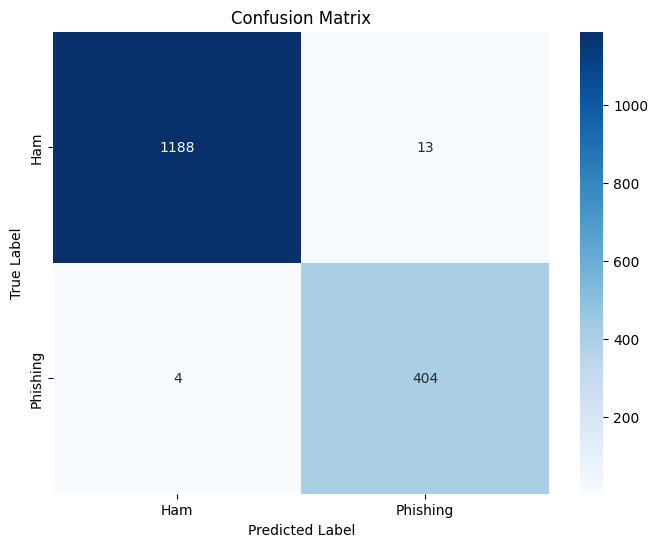

In [22]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Phishing'], yticklabels=['Ham', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Assuming 'model' is your trained machine learning model
model_filename = 'email_detection_logistic_regression.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(logistic_regression_model, model_file)

**Random Forests**

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=15)
history2 = random_forest_model.fit(X_train_features, y_train)



In [28]:
y_pred_train = random_forest_model.predict(X_train_features)

print("Accuracy on Test:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

y_pred_test = random_forest_model.predict(X_test_features)

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy on Test: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2751
           1       1.00      1.00      1.00      1002

    accuracy                           1.00      3753
   macro avg       1.00      1.00      1.00      3753
weighted avg       1.00      1.00      1.00      3753

Accuracy: 0.9875699192044748
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1201
           1       0.96      0.99      0.98       408

    accuracy                           0.99      1609
   macro avg       0.98      0.99      0.98      1609
weighted avg       0.99      0.99      0.99      1609



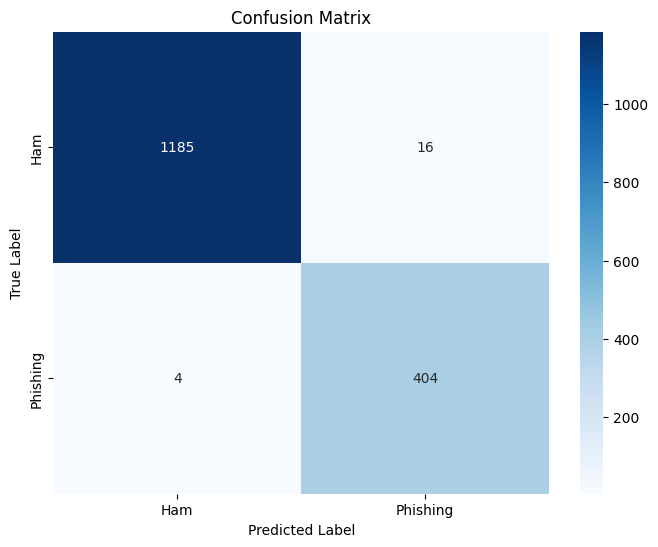

In [31]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Phishing'], yticklabels=['Ham', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [56]:
model_filename = 'email_detection_random_forest.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)

Naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB()
history3 = naive_bayes_model.fit(X_train_features, y_train)

In [35]:
y_pred_train = naive_bayes_model.predict(X_train_features)

print("Accuracy on Test:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

y_pred_test = naive_bayes_model.predict(X_test_features.toarray())

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy on Test: 0.9874766853184119
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2751
           1       1.00      0.96      0.98      1002

    accuracy                           0.99      3753
   macro avg       0.99      0.98      0.98      3753
weighted avg       0.99      0.99      0.99      3753

Accuracy: 0.9819763828464885
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1201
           1       1.00      0.93      0.96       408

    accuracy                           0.98      1609
   macro avg       0.99      0.96      0.98      1609
weighted avg       0.98      0.98      0.98      1609



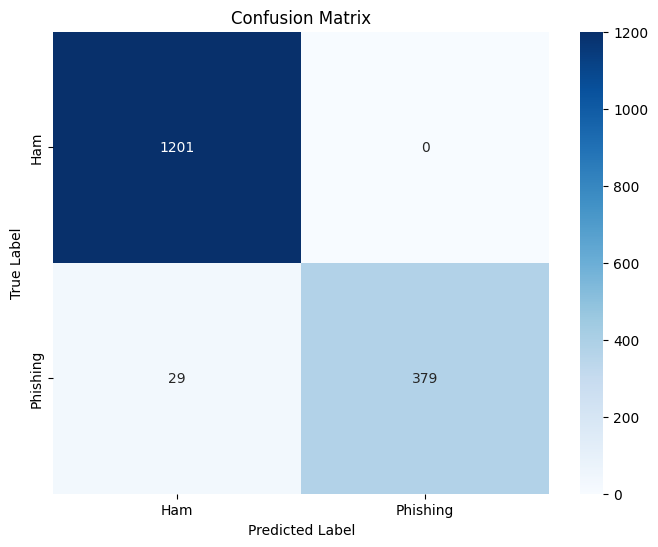

In [36]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Phishing'], yticklabels=['Ham', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
model_filename = 'email_detection_naive_bayes.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(naive_bayes_model, model_file)

**Loading and Testing Models**

In [38]:
with open('email_detection_logistic_regression.pkl', 'rb') as model_file:
    loaded_LR_model = pickle.load(model_file)
with open('email_detection_random_forest.pkl', 'rb') as model_file:
    loaded_RF_model = pickle.load(model_file)
with open('email_detection_naive_bayes.pkl', 'rb') as model_file:
    loaded_NB_model = pickle.load(model_file)

In [42]:
testing_dataframe = pd.read_csv('phishing_data_by_type.csv')
testing_data = [testing_dataframe["Text"][40]]

In [43]:
print("True Label: Phishing (1)")
testing_features = feature_extraction.transform(testing_data)
prediction = loaded_LR_model.predict(testing_features)
print(prediction)
prediction = loaded_RF_model.predict(testing_features)
print(prediction)
prediction = loaded_NB_model.predict(testing_features)
print(prediction)

True Label: Phishing (1)
[1]
[1]
[1]


In [57]:
print("True Label: Safe (0)")
text = ["Hello, We work with the Space Communications and Navigation (SCaN) Internship Project at NASA’s Goddard Space Flight Center in Greenbelt, MD. This past summer, we had the pleasure to work with one of your students, Carter T. Edmond. As an intern, Carter prototyped the messaging service for LunaNet, an innovative framework that aims to create an infrastructure of robust communications, navigation, and networking capabilities for NASA's long-term presence on the Moon.  The messaging service prototype is a core component of its interoperability, and his work offers a functional example of LunaNet's communication services. I wanted to reach out in case you would be interested in highlighting this as a story on your digital news and social media platforms. We’ve briefly described their work in our internal journal, viewable through https://esc.gsfc.nasa.gov/participate/ or directly accessible here. If you are interested in featuring Carter’s accomplishments in a story or social post, we would be happy to provide additional content, photos, project descriptions, or quotes as needed. A promotional video celebrating the summer class of 2023 is here. The SCaN Internship Project (SIP) is a 10-week curriculum of professional development that complements the core NASA intern experience. The SIP offers individualized mentorship, networking, and skill-building opportunities to students. This was Carter’s fourth internship with us. If any of your students are interested in similar opportunities, positions for summer 2024 are already online with new ones expected between now and the end of the calendar year on intern.nasa.gov. Rolling admissions close in February 2024. SIP positions can be found with keyword ‘SCaN’. Looking forward to hearing back from you, Korine Powers (she/her) and Jimmy Acevedo (he/him) Educational Outreach and STEM Engagement SpecialistsExploration & Space Communications (ESC) Projects Division | Code 450 NASA Goddard Space Flight Center ASRC Federal | Purpose-Driven. Enduring Commitment."]
input_features = feature_extraction.transform(text)
prediction = loaded_LR_model.predict(input_features)
print(prediction)
prediction = loaded_RF_model.predict(input_features)
print(prediction)
prediction = loaded_NB_model.predict(input_features)
print(prediction)

True Label: Safe (0)
[0]
[0]
[0]
